In [666]:
from rdkit import Chem
from rdkit.Chem import Draw

In [667]:
mols = [Chem.MolFromSmiles('NC(C)C(=O)' * x) for x in range(10)]
legends = ['mol-%d' % x for x in range(len(mols))]

In [668]:
# legends

In [669]:
# Draw.MolsToGridImage(mols, legends=legends)

In [670]:
s = "NC(C)C(=O)"
mol = Chem.MolFromSmiles(s)
natoms = mol.GetNumAtoms()
nbonds = mol.GetNumBonds()

print(f"{natoms=}")
print(f"{nbonds=}")

# Set up matrix with oligimer count for the molecules
repeats = [[1], [0, 2], [3, 0, 4]]
mols_matrix = [[Chem.MolFromSmiles(s * count) for count in row] for row in repeats]
legends_matrix = [[str(count) + " unit(s)" for count in row] for row in repeats]

def ith_item_list(nunits, items_per_unit, i = 0):
    return [((n * items_per_unit) + i) for n in range(nunits)]

highlightAtomLists_matrix = [[ith_item_list(count, natoms, 0) for count in row] for row in repeats]
# Another bond is created when molecule is oligomerized, so to keep the bond type consistent,
#   so make items per unit one more than the number of bonds
highlightBondLists_matrix = [[ith_item_list(count, nbonds + 1, 1) for count in row] for row in repeats]

highlightAtomLists_matrix
# mols_matrix


natoms=5
nbonds=4


[[[0]], [[], [0, 5]], [[0, 5, 10], [], [0, 5, 10, 15]]]

In [671]:
highlightAtomLists_matrix

[[[0]], [[], [0, 5]], [[0, 5, 10], [], [0, 5, 10, 15]]]

In [672]:
highlightBondLists_matrix

[[[1]], [[], [1, 6]], [[1, 6, 11], [], [1, 6, 11, 16]]]

In [673]:
legends_matrix

[['1 unit(s)'],
 ['0 unit(s)', '2 unit(s)'],
 ['3 unit(s)', '0 unit(s)', '4 unit(s)']]

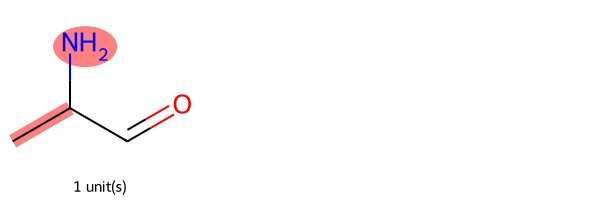

In [674]:
Draw.MolsToGridImage(mols_matrix[0], legends=legends_matrix[0], highlightAtomLists=highlightAtomLists_matrix[0], highlightBondLists=highlightBondLists_matrix[0])

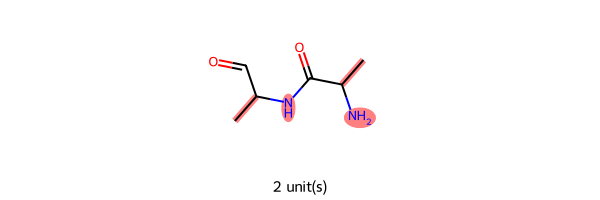

In [675]:
Draw.MolsToGridImage(mols_matrix[1], legends=legends_matrix[1], highlightAtomLists=highlightAtomLists_matrix[1], highlightBondLists=highlightBondLists_matrix[1])

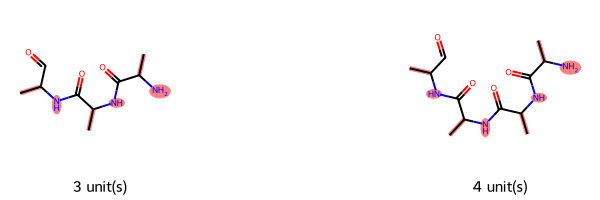

In [676]:
Draw.MolsToGridImage(mols_matrix[2], legends=legends_matrix[2], highlightAtomLists=highlightAtomLists_matrix[2], highlightBondLists=highlightBondLists_matrix[2])

In [677]:
def pad_list(input_list, length_should_be, pad_with = ""):
        length = len(input_list)
        padding_count = length_should_be - length
        padded_list = input_list + [pad_with] * padding_count
        return padded_list


In [678]:
pad_list([0, 1], 5, "")

[0, 1, '', '', '']

## Testing code

In [679]:
def _MolsNestedToLinear(mols_matrix, legends_matrix, highlightAtomLists_matrix, highlightBondLists_matrix):
  # Check that each item in nested lists is a list

  def check_elements_are_lists(nested_list, nested_list_name = ""):
    if nested_list is not None:
      for mol_row in nested_list:
        if not isinstance(mol_row, list):
          err = f"Each element in nested list {nested_list_name} must be a list."
          raise ValueError(err)

  check_elements_are_lists(mols_matrix, "mols_matrix")
  check_elements_are_lists(legends_matrix, "legends_matrix")
  check_elements_are_lists(highlightAtomLists_matrix, "highlightAtomLists_matrix")
  check_elements_are_lists(highlightBondLists_matrix, "highlightBondLists_matrix")
  
  # Check that other matrices (if provided) are same length,
  #   and each element (sub-list) is the same length, as mols_matrix

  n_mols_rows = len(mols_matrix)

  if legends_matrix is not None:
    n_legends_rows = len(legends_matrix)
    if n_legends_rows != n_mols_rows:
      err = f"If legends_matrix is provided it must be the same length (have the same number "
      err += f"of sub-lists) as mols_matrix, {n_mols_rows}; its length is {n_legends_rows}."
      raise ValueError(err)
    for row_index, row in enumerate(legends_matrix):
      if len(row) != len(mols_matrix[row_index]):
        err = f"If legends_matrix is provided each of its sub-lists must be the same length "
        err += f"as the corresponding sub-list of mols_matrix. For sub-list of index "
        err += f"{row_index}, its length in mols_matrix is {len(mols_matrix[row_index])} "
        err += f"while its length in legends_matrix is {len(row)}."
        raise ValueError(err)

  if highlightAtomLists_matrix is not None:
    n_highlightAtomLists_rows = len(highlightAtomLists_matrix)
    if n_highlightAtomLists_rows != n_mols_rows:
      err = f"If highlightAtomLists_matrix is provided it must be the same length (have the same number "
      err += f"of sub-lists) as mols_matrix, {n_mols_rows}; its length is {n_highlightAtomLists_rows}."
      raise ValueError(err)
    for row_index, row in enumerate(highlightAtomLists_matrix):
      if len(row) != len(mols_matrix[row_index]):
        err = f"If highlightAtomLists_matrix is provided each of its sub-lists must be the same length "
        err += f"as the corresponding sub-list of mols_matrix. For sub-list of index "
        err += f"{row_index}, its length in mols_matrix is {len(mols_matrix[row_index])} "
        err += f"while its length in highlightAtomLists_matrix is {len(row)}."
        raise ValueError(err)

  if highlightBondLists_matrix is not None:
    n_highlightBondLists_rows = len(highlightBondLists_matrix)
    if n_highlightBondLists_rows != n_mols_rows:
      err = f"If highlightBondLists_matrix is provided it must be the same length (have the same number "
      err += f"of sub-lists) as mols_matrix, {n_mols_rows}; its length is {n_highlightBondLists_rows}."
      raise ValueError(err)
    for row_index, row in enumerate(highlightBondLists_matrix):
      if len(row) != len(mols_matrix[row_index]):
        err = f"If highlightBondLists_matrix is provided each of its sub-lists must be the same length "
        err += f"as the corresponding sub-list of mols_matrix. For sub-list of index "
        err += f"{row_index}, its length in mols_matrix is {len(mols_matrix[row_index])} "
        err += f"while its length in highlightBondLists_matrix is {len(row)}."
        raise ValueError(err)


  def longest_row(matrix):
    return max(len(row) for row in matrix)

  molsPerRow = longest_row(mols_matrix)

  def pad_list(input_list, length_should_be, pad_with = ""):
    length = len(input_list)
    padding_count = length_should_be - length
    padded_list = input_list + [pad_with] * padding_count
    return padded_list

  def pad_matrix(input_matrix, row_length, pad_with = ""):
      padded_matrix = [pad_list(row, row_length, pad_with) for row in input_matrix]
      return padded_matrix

  def flatten_twoD_list(twoD_list: list[list]) -> list:
      return [item for sublist in twoD_list for item in sublist]

  # Pad matrices so they're rectangular (same length for each sublist),
  #   then convert to 1D lists
  null_mol = Chem.MolFromSmiles("")
  mols_matrix_padded = pad_matrix(mols_matrix, molsPerRow, null_mol)
  mols = flatten_twoD_list(mols_matrix_padded)

  if legends_matrix is not None:
    legends_matrix_padded = pad_matrix(legends_matrix, molsPerRow, "")
    legends = flatten_twoD_list(legends_matrix_padded)
  else:
    legends = None

  if highlightAtomLists_matrix is not None:
    highlightAtomLists_padded = pad_matrix(highlightAtomLists_matrix, molsPerRow, [])
    highlightAtomLists = flatten_twoD_list(highlightAtomLists_padded)
  else:
    highlightAtomLists = None

  if highlightBondLists_matrix is not None:
    highlightBondLists_padded = pad_matrix(highlightBondLists_matrix, molsPerRow, [])
    highlightBondLists = flatten_twoD_list(highlightBondLists_padded)
  else:
    highlightBondLists = None

  return mols, molsPerRow, legends, highlightAtomLists, highlightBondLists

In [680]:
def MolsMatrixToGridImage(mols_matrix, subImgSize=(200, 200), legends_matrix=None, highlightAtomLists_matrix=None, highlightBondLists_matrix=None, useSVG=False, returnPNG=False, **kwargs):
  mols, molsPerRow, legends, highlightAtomLists, highlightBondLists = _MolsNestedToLinear(mols_matrix, legends_matrix, highlightAtomLists_matrix, highlightBondLists_matrix)
  print(f"{mols=}")
  print(f"{molsPerRow=}")
  print(f"{legends=}")
  print(f"{highlightAtomLists=}")
  print(f"{highlightBondLists=}")

  print(f"{subImgSize=}")
  print(f"{useSVG=}")
  print(f"{returnPNG=}")
  print(f"{kwargs=}")

  return Draw.MolsToGridImage(mols=mols, molsPerRow=molsPerRow, subImgSize=subImgSize, legends=legends, highlightAtomLists=highlightAtomLists, highlightBondLists=highlightBondLists, useSVG=useSVG, returnPNG=returnPNG, kwargs=kwargs)

In [681]:
s = "NC(C)C(=O)"
mol = Chem.MolFromSmiles(s)
natoms = mol.GetNumAtoms()
nbonds = mol.GetNumBonds()

# Set up matrix with oligimer count for the molecules
repeats = [[1], [0, 2], [3, 0, 4]]
mols_matrix = [[Chem.MolFromSmiles(s * count) for count in row] for row in repeats]
legends_matrix = [[str(count) + " unit(s)" for count in row] for row in repeats]

def ith_item_list(nunits, items_per_unit, i = 0):
    return [((n * items_per_unit) + i) for n in range(nunits)]

highlightAtomLists_matrix = [[ith_item_list(count, natoms, 0) for count in row] for row in repeats]
# Another bond is created when molecule is oligomerized, so to keep the bond type consistent,
#   so make items per unit one more than the number of bonds
highlightBondLists_matrix = [[ith_item_list(count, nbonds + 1, 1) for count in row] for row in repeats]

In [682]:
mols, molsPerRow, legends, highlightAtomLists, highlightBondLists = _MolsNestedToLinear(mols_matrix, legends_matrix, highlightAtomLists_matrix, highlightBondLists_matrix)
dwg = Draw.MolsToGridImage(mols=mols, molsPerRow=molsPerRow, legends=legends, highlightAtomLists=highlightAtomLists, highlightBondLists=highlightBondLists)

In [683]:
# dwg

In [684]:
from rdkit.Chem.Draw.MolDrawing import DrawingOptions
UpdatedDrawingOptions = DrawingOptions()
UpdatedDrawingOptions.atomLabelFontSize = 16
UpdatedDrawingOptions.defaultColor = (0, 1, 0)

In [686]:
MolsMatrixToGridImage(mols_matrix=[[Chem.MolFromSmiles("C")]])

mols=[<rdkit.Chem.rdchem.Mol object at 0x16ca1f220>]
molsPerRow=1
legends=None
highlightAtomLists=None
highlightBondLists=None
subImgSize=(200, 200)
useSVG=False
returnPNG=False
kwargs={}


ArgumentError: Python argument types in
    MolDraw2D.DrawMolecules(MolDraw2DCairo, list)
did not match C++ signature:
    DrawMolecules(RDKit::MolDraw2D {lvalue} self, boost::python::api::object mols, boost::python::api::object highlightAtoms=None, boost::python::api::object highlightBonds=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, boost::python::api::object confIds=None, boost::python::api::object legends=None)

In [685]:
MolsMatrixToGridImage(mols_matrix=mols_matrix)

mols=[<rdkit.Chem.rdchem.Mol object at 0x16c936ab0>, <rdkit.Chem.rdchem.Mol object at 0x16ca1d540>, <rdkit.Chem.rdchem.Mol object at 0x16ca1d540>, <rdkit.Chem.rdchem.Mol object at 0x16c937610>, <rdkit.Chem.rdchem.Mol object at 0x16ca1e2d0>, <rdkit.Chem.rdchem.Mol object at 0x16ca1d540>, <rdkit.Chem.rdchem.Mol object at 0x16ca1e500>, <rdkit.Chem.rdchem.Mol object at 0x16ca1e490>, <rdkit.Chem.rdchem.Mol object at 0x16ca1dee0>]
molsPerRow=3
legends=None
highlightAtomLists=None
highlightBondLists=None
subImgSize=(200, 200)
useSVG=False
returnPNG=False
kwargs={}


ArgumentError: Python argument types in
    MolDraw2D.DrawMolecules(MolDraw2DCairo, list)
did not match C++ signature:
    DrawMolecules(RDKit::MolDraw2D {lvalue} self, boost::python::api::object mols, boost::python::api::object highlightAtoms=None, boost::python::api::object highlightBonds=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, boost::python::api::object confIds=None, boost::python::api::object legends=None)

In [ ]:
# MolsMatrixToGridImage(mols_matrix, (300,300), legends_matrix, highlightAtomLists_matrix, highlightBondLists_matrix, useSVG=False, returnPNG=False, options=UpdatedDrawingOptions)
MolsMatrixToGridImage(mols_matrix=mols_matrix, legends_matrix=legends_matrix, highlightAtomLists_matrix=highlightAtomLists_matrix, highlightBondLists_matrix=highlightBondLists_matrix)

mols=[<rdkit.Chem.rdchem.Mol object at 0x16c849cb0>, <rdkit.Chem.rdchem.Mol object at 0x16c849b60>, <rdkit.Chem.rdchem.Mol object at 0x16c849b60>, <rdkit.Chem.rdchem.Mol object at 0x16c84adc0>, <rdkit.Chem.rdchem.Mol object at 0x16c84a8f0>, <rdkit.Chem.rdchem.Mol object at 0x16c849b60>, <rdkit.Chem.rdchem.Mol object at 0x16c84ad50>, <rdkit.Chem.rdchem.Mol object at 0x16c84aea0>, <rdkit.Chem.rdchem.Mol object at 0x16c84a570>]
molsPerRow=3
legends=['1 unit(s)', '', '', '0 unit(s)', '2 unit(s)', '', '3 unit(s)', '0 unit(s)', '4 unit(s)']
highlightAtomLists=[[0], [], [], [], [0, 5], [], [0, 5, 10], [], [0, 5, 10, 15]]
highlightBondLists=[[1], [], [], [], [1, 6], [], [1, 6, 11], [], [1, 6, 11, 16]]
subImgSize=(200, 200)
useSVG=False
returnPNG=False
kwargs={}


ArgumentError: Python argument types in
    MolDraw2D.DrawMolecules(MolDraw2DCairo, list)
did not match C++ signature:
    DrawMolecules(RDKit::MolDraw2D {lvalue} self, boost::python::api::object mols, boost::python::api::object highlightAtoms=None, boost::python::api::object highlightBonds=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, boost::python::api::object confIds=None, boost::python::api::object legends=None)

In [ ]:
MolsMatrixToGridImage(mols_matrix, (300,300), legends_matrix, highlightAtomLists_matrix, highlightBondLists_matrix, useSVG=False, returnPNG=False)